# Differentiable ZNE: Noisy circuits
#### Challenge (1/15)
#### 100 points

Whenever we simulate quantum circuits, we can do so under the most ideal circumstances, i.e. without needing to worry about noise. In practice, implementing, say, a Pauli $Z$ gate on today's hardware isn't as easy as writing `qml.PauliZ`; what ends up actually being implemented is an operation that's close to `qml.PauliZ` because, in some way, real-world noise is present.

There are many ways to combat noise, including a technique called zero-noise extrapolation (ZNE). We will work more with ZNE later! But, on the path towards fault-tolerant quantum computing, we must inevitably understand noise in order to combat it.

PennyLane offers the ability to _simulate_ different types of noise that are present in quantum devices. One such type of noise is called a _bitflip error_. A _bitflip error_, occuring with a probability $p$
on a given single qubit, is an error resulting in the state of a qubit being accidentally flipped. Check out [this demo](https://pennylane.ai/qml/demos/tutorial_noisy_circuits.html#noisy-operations) to learn more about modelling noise in PennyLane!

In this challenge, you'll implement a two-qubit circuit that contains bitflip errors on each of the qubits to see how the resulting quantum state drifts from that of the noise-less/error-free circuit. To do so, the [fidelity](https://docs.pennylane.ai/en/stable/code/api/pennylane.math.fidelity.html?highlight=fidelity) between the respective states for various bitflip probabilities $p$ will be calculated.

## Challenge code

The provided code below contains a few functions:

* `circuit`: A quantum circuit that contains a Hadamard and CNOT gate.

[comment]: <img src="https://s3.us-east-1.amazonaws.com/grader-service-content-production/challenge-images/explorer_differentiable_ZNE/circuit.png" alt="Hadamard and CNOT gate" style="height: 200px;"/>

<img src=" 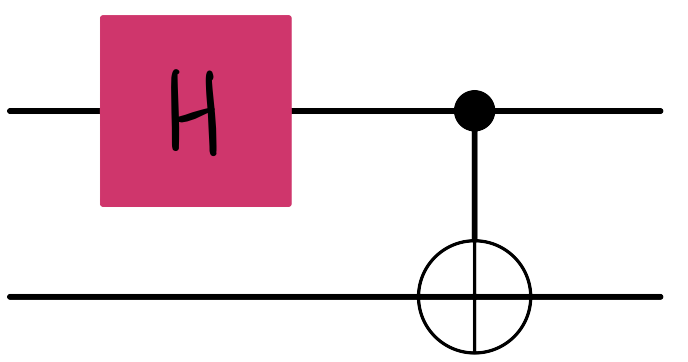" width=400>

* `bitflip_circuit`: A quantum circuit that must be exactly like `circuit`, with the exception of bitflip errors on each qubit. **You must complete this function**.
  
[comment]: <img src="https://s3.us-east-1.amazonaws.com/grader-service-content-production/challenge-images/explorer_differentiable_ZNE/noisy_circuit.png" alt="Hadamard and CNOT gate Noisy" style="height: 200px;"/>

<img src=" 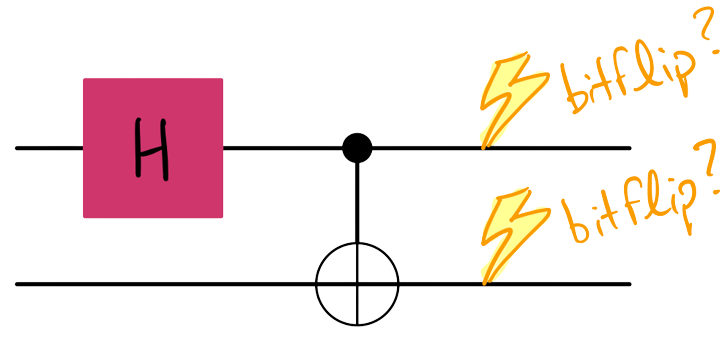" width=400>

* `fidelities`: This function returns the quantum fidelity between the resulting states from the circuits mentioned above for various bitflip probabilities.

### Input
As input to this problem, you are given a list of probabilities $p$ (`list(float)`) that define bitflip probabilities.

### Output
This code will output the `fidelities` (`list(float)`) between the error-free circuit's state and that of the circuits with bitflip errors given by the input probabilities.

If your solution matches the correct one within the given tolerance specified in `check` (in this case it's a `1e-4` relative error tolerance), the output will be `"Correct!"`. Otherwise, you will receive a `"Wrong answer"` prompt.

Good luck!

### Code

In [1]:
import json

import pennylane as qml
import pennylane.numpy as np

In [2]:
# Create the device used to simulate the quantum circuit 
# and to construct QNodes.
dev = qml.device("default.mixed", wires=2)

@qml.qnode(dev)
def circuit():
    """An error-less quantum circuit.

    Returns:
        qml.state():
            The quantum state.
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    
    return qml.state()

In [3]:
@qml.qnode(dev)
def bitflip_circuit(p):
    """A quantum circuit that contains two bitflip errors.
    It is the same circuit as the one above, but with bitflip errors.

    Args:
        p (float):
            The bitflip probability.

    Returns:
        qml.state():
            The quantum state.
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.BitFlip(p, wires=0)
    qml.BitFlip(p, wires=1)

    return qml.state()

In [4]:
def fidelities(probs):
    fids = np.zeros(len(probs))
    # For each bitflip-probability value in probs (list(float))...
    for i, p in enumerate(probs):
        # Compute the fidelity between the output of the noisy circuit
        # and the ideal circuit
        fid = qml.math.fidelity(bitflip_circuit(p), circuit())
        fids[i] = fid
    return np.round_(fids, decimals=5).tolist()

In [5]:
def run(test_case_input: str) -> str:
    probs = json.loads(test_case_input)
    fids = fidelities(probs)
    return str(fids)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your circuit isn't quite right!"


test_cases = [['[0.05, 0.1, 0.15, 0.2, 0.25]', '[0.905, 0.82, 0.745, 0.68, 0.625]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")


Running test case 0 with input '[0.05, 0.1, 0.15, 0.2, 0.25]'...
Correct!
